## Dogs vs Cats image classification (without image augmentation)

### Importing packages

In [1]:
from __future__ import absolute_import, division, print_function

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-02-22 07:44:35.949168: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 07:44:40.239821: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 07:44:40.275415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-22 07:44:52.927813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Data loading

In [6]:
dir_name = os.path.dirname("/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/")
print(os.listdir(dir_name))
!find $dir_name -type d -print

['validation', 'train', 'vectorize.py']
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/cats
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/dogs
/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/train/cats


In [7]:
train_dir = os.path.join(dir_name, "train")
val_dir = os.path.join(dir_name, "validation")

train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")
val_cats_dir = os.path.join(val_dir, "cats")
val_dogs_dir = os.path.join(val_dir, "dogs")
val_dogs_dir

'/home/login/Documents/Machine_learning/Datasets/cats_and_dogs_filtered/validation/dogs'

### Understanding the data

In [8]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

num_train = num_cats_train + num_dogs_train
num_val = num_cats_val + num_dogs_val

In [9]:
print(f"Total number of train data: {num_train}")
print(f"Total number of validation data: {num_val}")
print("---" * 15)
print(f"Total number of dogs train data: {num_dogs_train}")
print(f"Total number of cats train data: {num_cats_train}")
print("---" * 15)
print(f"Total number of dogs validation data: {num_dogs_val}")
print(f"Total number of cats validation data: {num_cats_val}")

Total number of train data: 2000
Total number of validation data: 1000
---------------------------------------------
Total number of dogs train data: 1000
Total number of cats train data: 1000
---------------------------------------------
Total number of dogs validation data: 500
Total number of cats validation data: 500


### Setting model parameters

In [11]:
BATCH_SIZE = 100
IMG_SHAPE = 150

### Data Preparation

In [13]:
train_img_gen = ImageDataGenerator(rescale=1./255)
val_img_gen = ImageDataGenerator(rescale=1./255)
train_img_gen

In [15]:
train_data_gen = train_img_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory=train_dir,
                                                  shuffle=True,
                                                  target_size=(IMG_SHAPE, IMG_SHAPE),
                                                  class_mode='binary')

val_data_gen = val_img_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = val_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE),
                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualizing the Images

In [38]:
sample_images = next(train_data_gen)
sample_images[0][0].shape

(150, 150, 3)

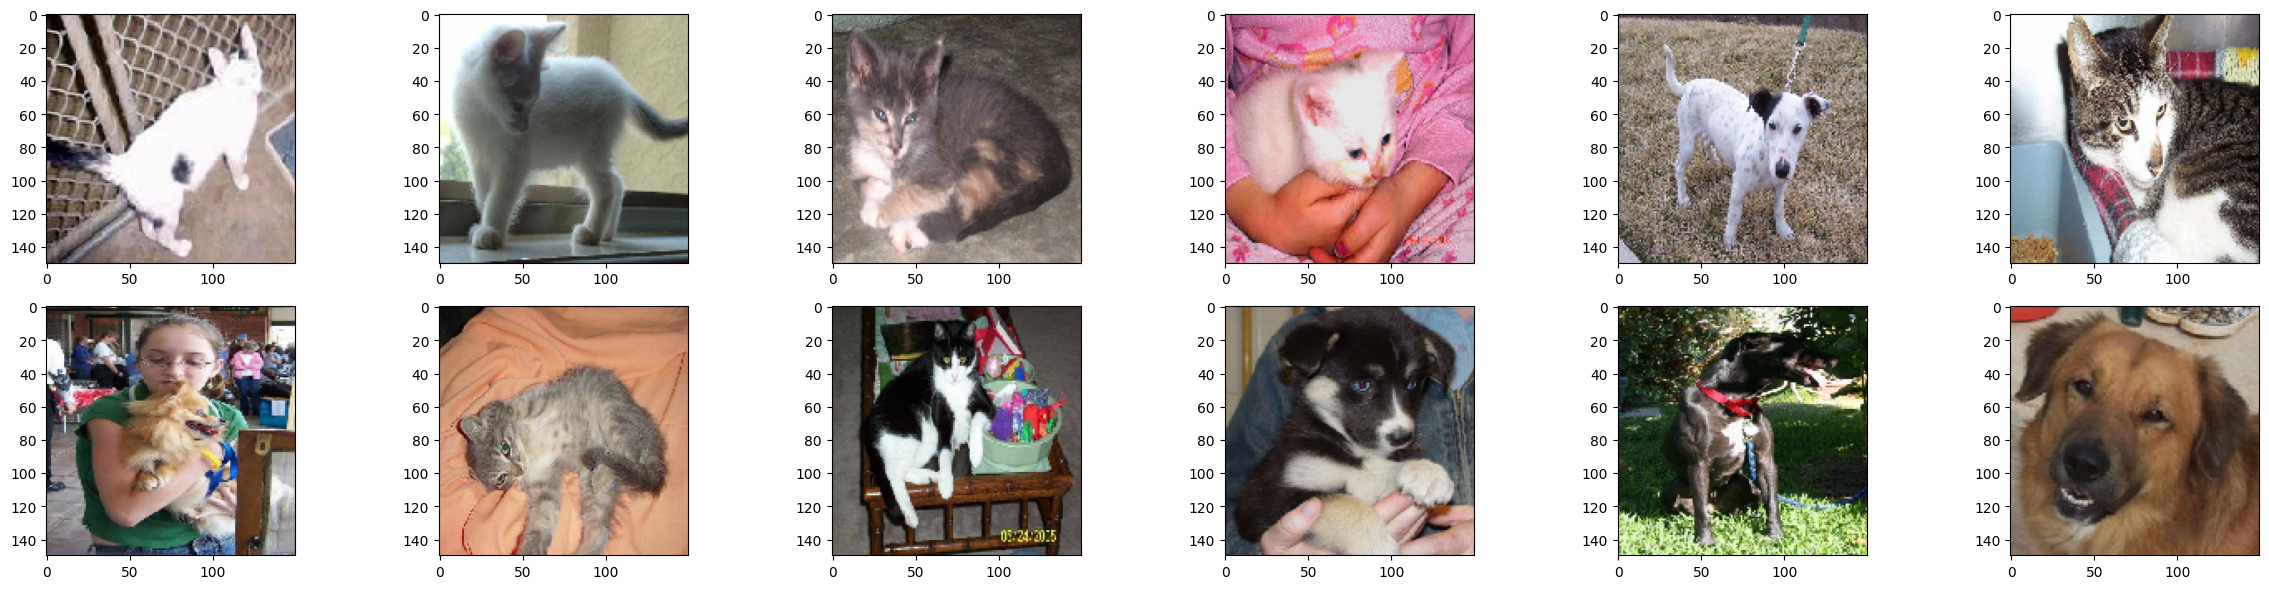

In [48]:
def plot_images(images):
    fig, axes = plt.subplots(2, 6, figsize = (24, 6))
    
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
plot_images(sample_images[0][:13])

### Model Creation
#### Define the model

In [50]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

### Compile the model

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'],
             optimizers = 'adam')